In [2]:
import math
import collections
import urllib.request
import getweather

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

### Create weather visualizations from the datasets

In [3]:
#use the town of 'PASADENA' as a case study.
#create a vertical stack of the data in numpy
# for records: get TMIN/TMAX arrays for years 1910-2018, stack vertically in array
allyears = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                      for year in range(1910, 2019)])

Text(0, 0.5, 'Years')

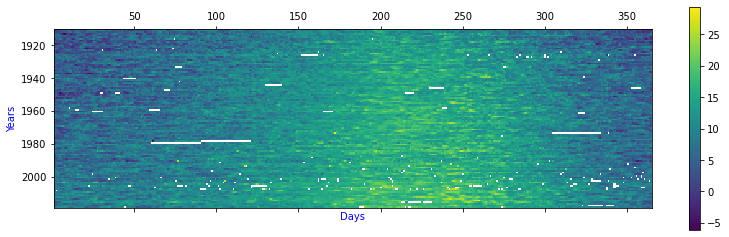

In [5]:
# show stacked array as colored map, specifying axis values,
# and creating temperature-reference colorbar

pp.matshow(allyears['TMIN'], extent=[1,365,2019,1910])
pp.colorbar()
pp.xlabel('Days', color= 'blue')
pp.ylabel('Years', color='blue')

#### Observation from the above plot- Winter and summer nights getting warmer towards the end of the century.

In [6]:
# min and max of TMIN/TMAX along all years, excluding NaNs

tmin_record = np.nanmin(allyears['TMIN'], axis=0)
tmax_record = np.nanmax(allyears['TMAX'], axis=0)

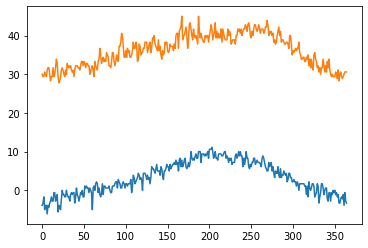

In [7]:
pp.plot(tmin_record)
pp.plot(tmax_record)

In [8]:
# for normals: get TMIN/TMAX arrays for years 1981-2010, stack vertically in array

normal = np.vstack([getweather.getyear('PASADENA', ['TMIN','TMAX'], year)
                    for year in range(1981, 2011)])

In [9]:
# mean of TMIN/TMAX across 1981-2010 years, excluding NaNs

tmin_normal = np.nanmean(normal['TMIN'], axis=0)
tmax_normal = np.nanmean(normal['TMAX'], axis=0)

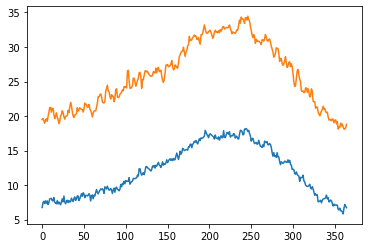

In [10]:
pp.plot(tmin_normal)
pp.plot(tmax_normal)

In [11]:
station, year = 'PASADENA', 2018

thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

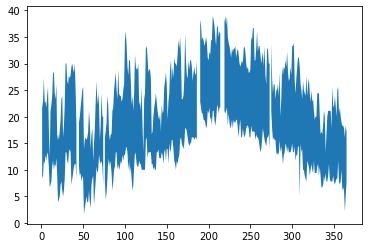

In [12]:
# fill area between horizontal curves (days, thisyear['TMIN']) and (days, thisyear['TMAX'])

days = np.arange(1, 366)

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])

In [15]:
#calculating average temperature for the year in 'PASADENA'
avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))

In [16]:
avg

19.4620142532151

In [17]:
# formatted string literal: will insert values of variable in braces
f'{station}, {year}: average temperature = {avg:.2f} C'

'PASADENA, 2018: average temperature = 19.46 C'

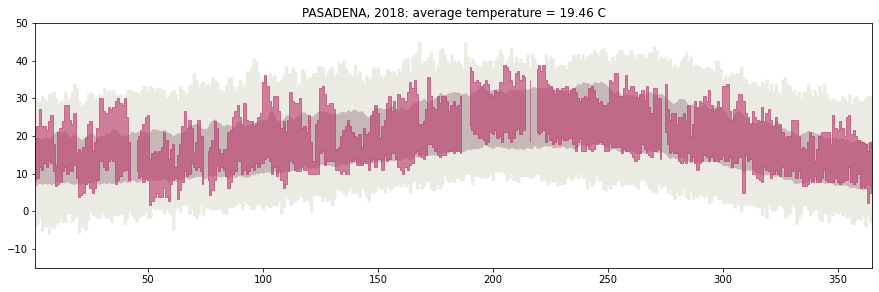

In [18]:
# show normals, records, and current year bands together

pp.figure(figsize=(15,4.5))

pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))

pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'],
                color=(0.73,0.21,0.41), alpha=0.6, step='mid')

pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)

pp.title(f'{station}, {year}: average temperature = {avg:.2f} C');

In [19]:
# collect data and make chart for any city and current year,
# following the same steps as above

def anyplot(station, year):
    pp.figure(figsize=(15,4.5))
    
    allyears = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                          for year in range(1910, 2020)])
    
    normal = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                        for year in range(1981, 2011)])

    tmin_record, tmax_record = np.nanmin(allyears['TMIN'], axis=0), np.nanmax(allyears['TMAX'], axis=0)
    tmin_normal, tmax_normal = np.nanmean(normal['TMIN'], axis=0), np.nanmean(normal['TMAX'], axis=0)

    days = np.arange(1, 366)

    pp.fill_between(days, tmin_record, tmax_record, color=(0.92,0.92,0.89), step='mid')
    pp.fill_between(days, tmin_normal, tmax_normal, color=(0.78,0.72,0.72))
    
    thisyear = getweather.getyear(station, ['TMIN', 'TMAX'], year)

    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73,0.21,0.41), alpha=0.6, step='mid')

    pp.axis(xmin=1, xmax=365, ymin=-15, ymax=50)
    
    avg = 0.5*(np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))
    pp.title(f'{station}, {year}: average temperature = {avg:.2f} C');

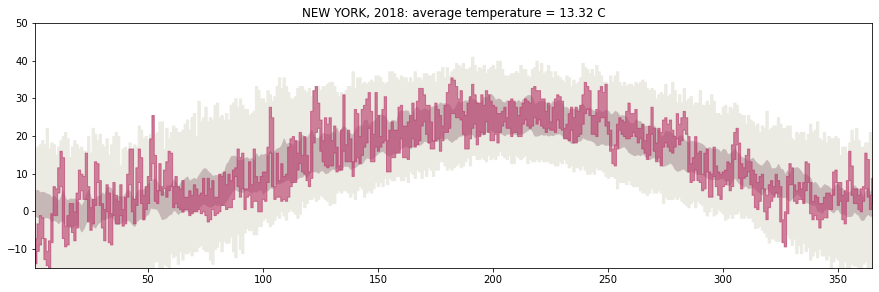

In [20]:
#Generate plots for the city of 'New York'
anyplot('NEW YORK', 2018)
any

<ipython-input-23-3a38a34cc55a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pp.subplot()
<ipython-input-23-3a38a34cc55a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  pp.subplot()
<ipython-input-23-3a38a34cc55a>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwh

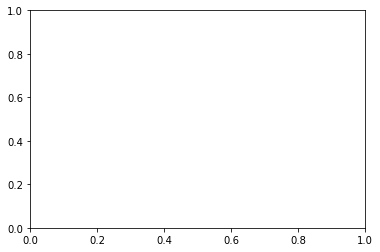

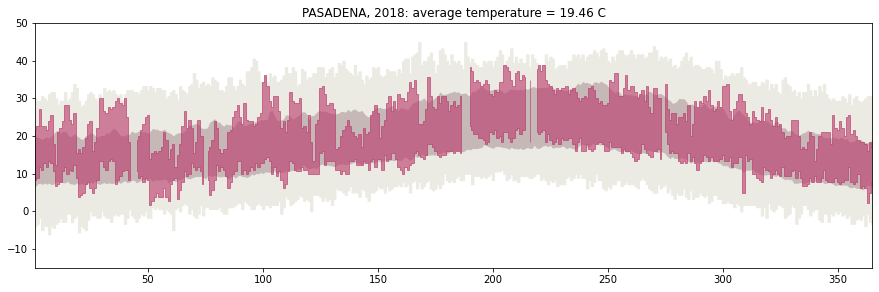

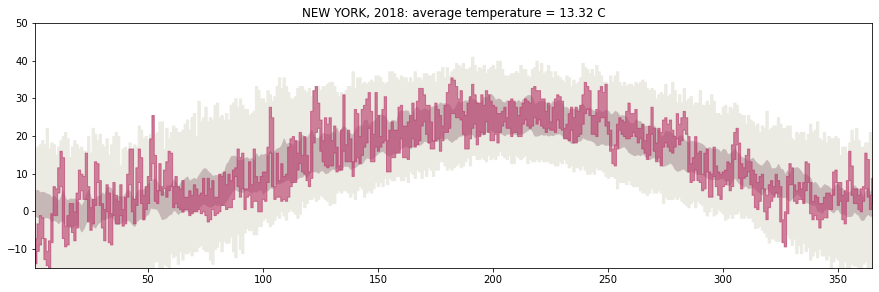

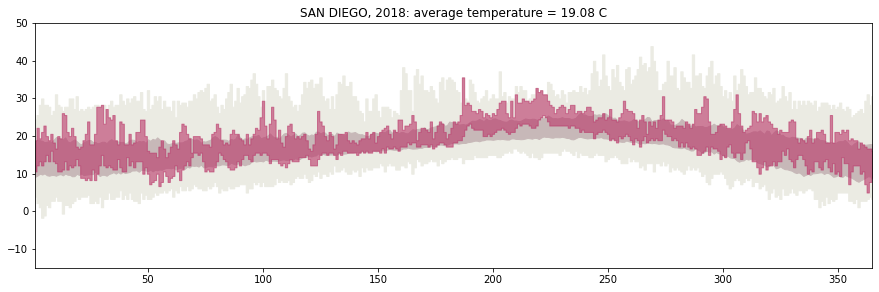

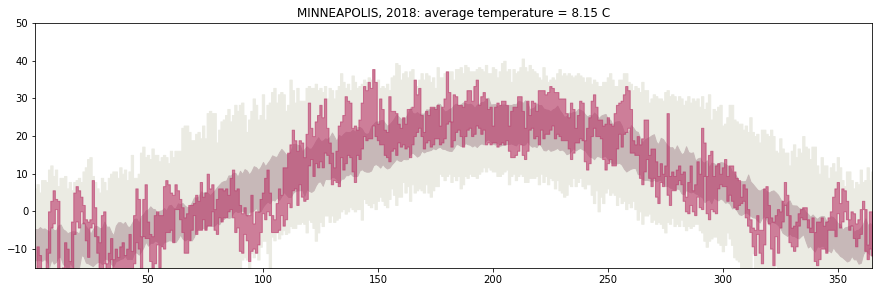

In [23]:
#plots for four (4) cities in the U.S for year 2018
#pp.figure(figsize=(12,9))

for i, city in enumerate(['PASADENA','NEW YORK','SAN DIEGO','MINNEAPOLIS']):
    pp.subplot()
    anyplot(city, 2018)

### Plotting temperature anomaly for 'New york' by computing hilly temperature averages for each year and comparing to mid century average in the 1945-1955 decade.

In [24]:
# Create a general function to smooth any array--to reduce noise

def smooth_array(array, window=10, mode='valid'):
    return np.correlate(array, np.ones(window)/window, mode)

In [25]:
# get all historical data for New York, stacked into array

station = 'NEW YORK'

allyears = np.arange(1880, 2020)

alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                     for year in allyears])

In [26]:
# compute (TMIN + TMAX)/2, averaged over days in every year
allavg = np.nanmean(0.5 * (alldata['TMIN'] + alldata['TMAX']), axis=1)

In [27]:
allavg.shape

(140,)

In [29]:
# find the index of values 1945 and 1955 in allyears
list(allyears).index(1945), list(allyears).index(1955)

(65, 75)

In [30]:
midcentury = np.nanmean(allavg[65:75])

In [31]:
midcentury

12.858013698630137

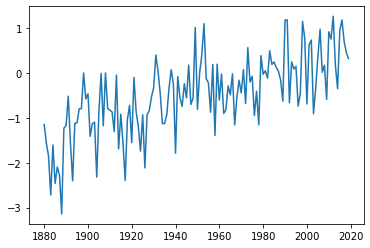

In [32]:
pp.plot(allyears, allavg - midcentury)

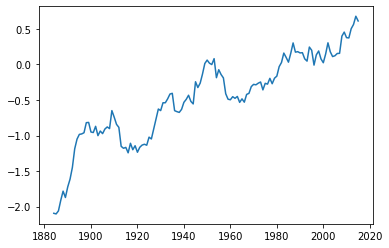

In [34]:
pp.plot(allyears[4:-4], smooth_array(allavg - midcentury, 9, 'valid'))

In [38]:
# compute and plot the temperature anomaly time series for any station

allyears = np.arange(1880, 2020)

def plotanomaly(station):
    # grab the data
    alldata = np.vstack([getweather.getyear(station, ['TMIN','TMAX'], year)
                         for year in allyears])
    
    # make yearly averages, and then the midcentury average
    allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
    midcentury = np.nanmean(allavg[65:75])
    
    # plot with smoothing, adding a label that we can show in a legend
    pp.plot(allyears[4:-4], smooth_array(allavg - midcentury, 9, 'valid'), label=station)
    
    # set a reasonable range
    pp.axis(ymin=-3,ymax=3)

<ipython-input-38-4215e8a65a6c>:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)
<ipython-input-38-4215e8a65a6c>:11: RuntimeWarning: Mean of empty slice
  allavg = np.nanmean(0.5 * (alldata[:,:]['TMIN'] + alldata[:,:]['TMAX']), axis=1)


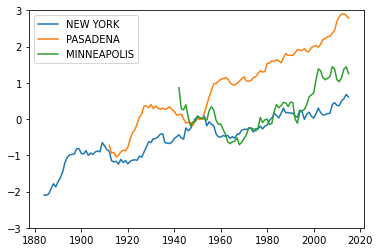

In [39]:
plotanomaly('NEW YORK')
plotanomaly('PASADENA')
plotanomaly('MINNEAPOLIS')

pp.legend()